This file will make a plot of E/N vs N/S, with colour indicating how good the analytic approximation is for the biomass expression. I will do this for both the first and second order approximations.

The equation being approximated is
$$ B = S \int \sum n \varepsilon R$$

and the approximation is
$$ B = 4.17 \frac{E^{4/3}}{S^{1/3} \log(1/\beta)} \left( 1-1.16 \beta^{1/3} \right) $$

Note that at this point, this includes the approximation for the normalization Z, so there are multiple approximations going on here.

Additionally, note that because we want to only have two variables, we are redefining N/S, E/S as just N and E, and B becomes B/S. In this case, the S dependence actually just drops out. So we can pick an S and plot accordingly. 

We here choose $S=50$. Initially, I picked $S=1$, however this doesn't work very well because the sum for the first constraint goes to N, but it is equal to N/S. So we want $S>1$ to make these not the same. So that this error in summation doesn't have a large effect, we need $S$ $\approx$ 30 at the smallest, but closer to $S=50$. Data points with $S$ less than this are marked with an asterix.

In [1]:
import pandas as pd
import numpy as np
import biomass as bm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the data to overlay
data = pd.read_csv('data_statevariables.csv')

In [3]:
# Find max N/S and E/N
print(np.min(data['N']/data['S']),np.max(data['N']/data['S']))
print(np.min(data['E']/data['N']),np.max(data['E']/data['N']))

1.4285714285714286 766.5732899022802
2.829238 3262.106995884774


In [4]:
# Define ns and en along with the number in each direction.
# Could also make this higher and then save the grid, but this is OK for now.
num_ns = 40
num_en = 40
# Log spacing since we will use a log log plot
ns = np.logspace(np.log10(1),np.log10(800),num=num_ns)
en = np.logspace(np.log10(2),np.log10(3500),num=num_en)

# Set s also
s0=50 

In [5]:
# Numerical
biomass_num = np.zeros([num_en,num_ns]) 
# First order
biomass_1 = np.zeros([num_en,num_ns]) 
# Second order
biomass_2 = np.zeros([num_en,num_ns])

# This is slow but should be ok just for a plot
for i,e in enumerate(en):
    for j,n in enumerate(ns):
        s = pd.Series([s0,n*s0,e*n*s0],index=['S','N','E'])
        print(n,e) #just to keep track
        biomass_num[i,j] = bm.biomass(s)
        biomass_1[i,j] = bm.biomass_approx(s,order=0)
        biomass_2[i,j] = bm.biomass_approx(s,order=1)

1.0 2.0
1.186965797184997 2.0
1.4088878036870154 2.0
1.6723016350475777 2.0
1.984964843378022 2.0
2.3560853777043866 2.0
2.796592758582802 2.0
3.319459953093025 2.0
3.9400854294467353 2.0
4.676746642740235 2.0
5.551138307032422 2.0
6.589011305890913 2.0
7.820931057357765 2.0
9.28317766722556 2.0
11.018814380188347 2.0
13.078955794813771 2.0
15.524273191338462 2.0
18.426781304274737 2.0
21.871959160382062 2.0
25.96126744080059 2.0
30.815136503802776 2.0
36.576513065600764 2.0
43.41506998915827 2.0
51.53220315952368 2.0
61.16696260394325 2.0
72.6030925285744 2.0
86.1773876012754 2.0
102.28961157346828 2.0
121.41427034504552 2.0
144.11458618974177 2.0
171.0590846826927 2.0
203.04128281612816 2.0
241.0030581193101 2.0
286.0623870046092 2.0
339.54626923556896 2.0
403.0298081443885 2.0
478.3825975134207 2.0
567.8237812169473 2.0
673.9874071327728 2.0
800.0000000000003 2.0
1.0 2.422059553902192
1.186965797184997 2.422059553902192
1.4088878036870154 2.422059553902192
1.6723016350475777 2.42205

5.551138307032422 6.3089767397604195
6.589011305890913 6.3089767397604195
7.820931057357765 6.3089767397604195
9.28317766722556 6.3089767397604195
11.018814380188347 6.3089767397604195
13.078955794813771 6.3089767397604195
15.524273191338462 6.3089767397604195
18.426781304274737 6.3089767397604195
21.871959160382062 6.3089767397604195
25.96126744080059 6.3089767397604195
30.815136503802776 6.3089767397604195
36.576513065600764 6.3089767397604195
43.41506998915827 6.3089767397604195
51.53220315952368 6.3089767397604195
61.16696260394325 6.3089767397604195
72.6030925285744 6.3089767397604195
86.1773876012754 6.3089767397604195
102.28961157346828 6.3089767397604195
121.41427034504552 6.3089767397604195
144.11458618974177 6.3089767397604195
171.0590846826927 6.3089767397604195
203.04128281612816 6.3089767397604195
241.0030581193101 6.3089767397604195
286.0623870046092 6.3089767397604195
339.54626923556896 6.3089767397604195
403.0298081443885 6.3089767397604195
478.3825975134207 6.308976739

13.078955794813771 19.901593751419014
15.524273191338462 19.901593751419014
18.426781304274737 19.901593751419014
21.871959160382062 19.901593751419014
25.96126744080059 19.901593751419014
30.815136503802776 19.901593751419014
36.576513065600764 19.901593751419014
43.41506998915827 19.901593751419014
51.53220315952368 19.901593751419014
61.16696260394325 19.901593751419014
72.6030925285744 19.901593751419014
86.1773876012754 19.901593751419014
102.28961157346828 19.901593751419014
121.41427034504552 19.901593751419014
144.11458618974177 19.901593751419014
171.0590846826927 19.901593751419014
203.04128281612816 19.901593751419014
241.0030581193101 19.901593751419014
286.0623870046092 19.901593751419014
339.54626923556896 19.901593751419014
403.0298081443885 19.901593751419014
478.3825975134207 19.901593751419014
567.8237812169473 19.901593751419014
673.9874071327728 19.901593751419014
800.0000000000003 19.901593751419014
1.0 24.101422641752297
1.186965797184997 24.101422641752297
1.4088

1.0 62.77934603093197
1.186965797184997 62.77934603093197
1.4088878036870154 62.77934603093197
1.6723016350475777 62.77934603093197
1.984964843378022 62.77934603093197
2.3560853777043866 62.77934603093197
2.796592758582802 62.77934603093197
3.319459953093025 62.77934603093197
3.9400854294467353 62.77934603093197
4.676746642740235 62.77934603093197
5.551138307032422 62.77934603093197
6.589011305890913 62.77934603093197
7.820931057357765 62.77934603093197
9.28317766722556 62.77934603093197
11.018814380188347 62.77934603093197
13.078955794813771 62.77934603093197
15.524273191338462 62.77934603093197
18.426781304274737 62.77934603093197
21.871959160382062 62.77934603093197
25.96126744080059 62.77934603093197
30.815136503802776 62.77934603093197
36.576513065600764 62.77934603093197
43.41506998915827 62.77934603093197
51.53220315952368 62.77934603093197
61.16696260394325 62.77934603093197
72.6030925285744 62.77934603093197
86.1773876012754 62.77934603093197
102.28961157346828 62.779346030931

121.41427034504552 163.52753721864704
144.11458618974177 163.52753721864704
171.0590846826927 163.52753721864704
203.04128281612816 163.52753721864704
241.0030581193101 163.52753721864704
286.0623870046092 163.52753721864704
339.54626923556896 163.52753721864704
403.0298081443885 163.52753721864704
478.3825975134207 163.52753721864704
567.8237812169473 163.52753721864704
673.9874071327728 163.52753721864704
800.0000000000003 163.52753721864704
1.0 198.03671692326017
1.186965797184997 198.03671692326017
1.4088878036870154 198.03671692326017
1.6723016350475777 198.03671692326017
1.984964843378022 198.03671692326017
2.3560853777043866 198.03671692326017
2.796592758582802 198.03671692326017
3.319459953093025 198.03671692326017
3.9400854294467353 198.03671692326017
4.676746642740235 198.03671692326017
5.551138307032422 198.03671692326017
6.589011305890913 198.03671692326017
7.820931057357765 198.03671692326017
9.28317766722556 198.03671692326017
11.018814380188347 198.03671692326017
13.0789

13.078955794813771 515.8457143113754
15.524273191338462 515.8457143113754
18.426781304274737 515.8457143113754
21.871959160382062 515.8457143113754
25.96126744080059 515.8457143113754
30.815136503802776 515.8457143113754
36.576513065600764 515.8457143113754
43.41506998915827 515.8457143113754
51.53220315952368 515.8457143113754
61.16696260394325 515.8457143113754
72.6030925285744 515.8457143113754
86.1773876012754 515.8457143113754
102.28961157346828 515.8457143113754
121.41427034504552 515.8457143113754
144.11458618974177 515.8457143113754
171.0590846826927 515.8457143113754
203.04128281612816 515.8457143113754
241.0030581193101 515.8457143113754
286.0623870046092 515.8457143113754
339.54626923556896 515.8457143113754
403.0298081443885 515.8457143113754
478.3825975134207 515.8457143113754
567.8237812169473 515.8457143113754
673.9874071327728 515.8457143113754
800.0000000000003 515.8457143113754
1.0 624.7045203436838
1.186965797184997 624.7045203436838
1.4088878036870154 624.7045203436

13.078955794813771 1627.2293064477838
15.524273191338462 1627.2293064477838
18.426781304274737 1627.2293064477838
21.871959160382062 1627.2293064477838
25.96126744080059 1627.2293064477838
30.815136503802776 1627.2293064477838
36.576513065600764 1627.2293064477838
43.41506998915827 1627.2293064477838
51.53220315952368 1627.2293064477838
61.16696260394325 1627.2293064477838
72.6030925285744 1627.2293064477838
86.1773876012754 1627.2293064477838
102.28961157346828 1627.2293064477838
121.41427034504552 1627.2293064477838
144.11458618974177 1627.2293064477838
171.0590846826927 1627.2293064477838
203.04128281612816 1627.2293064477838
241.0030581193101 1627.2293064477838
286.0623870046092 1627.2293064477838
339.54626923556896 1627.2293064477838
403.0298081443885 1627.2293064477838
478.3825975134207 1627.2293064477838
567.8237812169473 1627.2293064477838
673.9874071327728 1627.2293064477838
800.0000000000003 1627.2293064477838
1.0 1970.6231440357465
1.186965797184997 1970.6231440357465
1.4088

Text(0.5, 0, '$\\log_{10}(N/S)$')

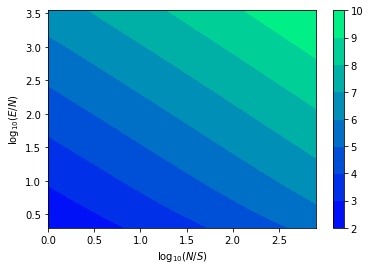

In [16]:
# Plot the biomass directly, just to see it.
fig,axs = plt.subplots()

# Plot the contours
im = axs.contourf(np.log10(ns),np.log10(en),np.log10(biomass_num),cmap='winter')
plt.colorbar(im)
axs.set_ylabel(r'$\log_{10}(E/N)$')
axs.set_xlabel(r'$\log_{10}(N/S)$')

In [6]:
# Get percent differences. Note that in doing this, the S dependence drops out. Since really we care about B/S
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

In [7]:
# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

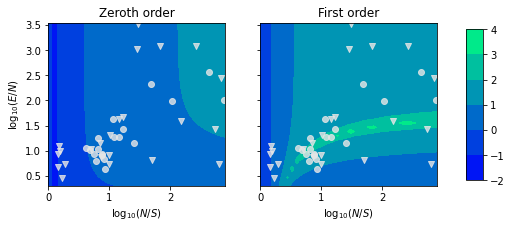

In [19]:
# Plotting
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(np.log10(ns),np.log10(en),z_bm1,contour,cmap='winter')
im2 = axs[1].contourf(np.log10(ns),np.log10(en),z_bm2,contour,cmap='winter')

# Overlay the data
for ax in axs:
    # First separate it out based on a threshold for S. Basically with S<50 put an asterix that
    # this may not be the most accurate
    # Define the threshold
    st = 50
    # Get the indices where this is true
    ind_st = data['S'] > st
    # Plot these ones normally
    ax.scatter(np.log10(data[ind_st]['N']/data[ind_st]['S']),np.log10(data[ind_st]['E']/data[ind_st]['N']),
               c='0.9',alpha=0.8)
    # Plot the ones where S<50 with an asterix
    ax.scatter(np.log10(data[~ind_st]['N']/data[~ind_st]['S']),np.log10(data[~ind_st]['E']/data[~ind_st]['N']),
               marker='v',c='0.9',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

#axs[0].axvline(np.log10(100))
#axs[0].axhline(np.log10(25))

#axs[1].axvline(np.log10(3))
#axs[1].axhline(np.log10(5))

# Now labels and titles
axs[0].set_ylabel(r'$\log_{10}(E/N)$')
for ax in axs:
    ax.set_xlabel(r'$\log_{10}(N/S)$')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('Figures/FigS1.pdf',bbox_inches='tight')